In [2]:
# Load libraries
import numpy as np
import pandas as pd

In [113]:
# # Load the training dataset
# train_set_df = pd.read_csv("../../data/Training_dataset_full.csv")
# train_set_df.head()

In [114]:
# # Get the list of drug names
# smiles = train_set_df['SMILES'].tolist()
# print(smiles)
# len(smiles)

In [115]:
# # Filter out drugs with nan smiles
# train_set_df_not_na = train_set_df[train_set_df['SMILES'].notna()]
# len(train_set_df_not_na)

In [116]:
# train_set_df_not_na.head()

In [117]:
# train_set_smiles_data = {'DRUG_NAME': train_set_df_not_na['DRUG NAME'].tolist(), 'SMILES': train_set_df_not_na['SMILES'].tolist()}
# train_set_smiles_df = pd.DataFrame(data=train_set_smiles_data)
# train_set_smiles_df.head()

In [118]:
# train_set_smiles_df.to_csv("../../data/training_dataset_smiles.csv", index=False)

In [171]:
# train_set_smiles_df = pd.read_csv("../../data/training_dataset_smiles.csv")
# train_set_smiles_df.head()

In [129]:
from rdkit.Chem import MolFromSmiles, MolToSmiles

def smiles_to_mol(smiles):
    try:
        if smiles is not np.nan:
            return MolToSmiles(MolFromSmiles(smiles))
    except:
        return None

standardized_smiles = []
for smiles in train_set_smiles_df['SMILES']:
    standardized_smiles.append(smiles_to_mol(smiles))

train_set_smiles_df['standardized_SMILES'] = standardized_smiles
train_set_smiles_df.head()


In [130]:
# train_set_smiles_df.to_csv("../../data/training_dataset_smiles_standardized.csv", index=False)

In [8]:
# Load the gene expression dataset
gene_expression_df = pd.read_csv("../../data/l100_chemical_perturbagens.csv")
gene_expression_df.head()

,0,2,3,4,5,6,7,8,9,10,...,242,243,244,245,246,247,248,249,250,251
0,ABY001_A375_XH_A13_afatinib_10uM up,RRAGC,VPS8,KCNJ2,DUSP5,BEX1,LIMS1,RAB13,COLEC12,ARMCX2,...,GEM,BEX3,VEGFA,NUPR1,TSPAN6,CA12,TMEM158,CHI3L1,CDC20,HMOX1
1,ABY001_A375_XH_A13_afatinib_10uM down,PCNA,S100A7,DNMT1,S100P,S100A9,PUF60,TMEM45A,GOLT1B,PRSS23,...,AKAP12,SCEL,CTSC,EAF2,MORF4L1,KCNK3,MYB,MAF,LTF,MFNG
2,ABY001_A375_XH_A14_erlotinib_10uM up,CDKN2C,TIMP3,COLGALT2,AMPD3,TGFB1,SERPINB3,MMP7,PIGR,WDR61,...,RHOBTB3,TMSB15A,RPS4Y1,JCHAIN,PLAT,FAM129A,ASNS,PCNA,TNFSF10,CHAC1
3,ABY001_A375_XH_A14_erlotinib_10uM down,PCP4,SPINK1,STEAP1,HOXC6,ITGB1BP1,MRPS16,XIST,UCHL1,FABP4,...,PEG3,WBP1L,SCG5,ATP5F1E,CCL19,EGLN1,MAST4,ATP6V1H,GPX2,EBP
4,ABY001_A375_XH_A15_neratinib_10uM up,ITGAE,PRPF4,UBE2S,OGT,RRAGC,ASNA1,TNFRSF1A,FGL2,GOLGA8A,...,HSPA1A,CHI3L1,KLK11,MSMO1,ADM,HSPA8,TMEM158,KRT14,HMGCS1,HMOX1


In [125]:
# # Extract the drug names from gene expression dataset
# gene_expression_df_drug_names = gene_expression_df.copy()
# for i in range(len(gene_expression_df)):
#     gene_expression_df_drug_names.iloc[i, 0] = gene_expression_df.iloc[i, 0].split('_')[4]
# gene_expression_df_drug_names.head()

In [126]:
# gene_expression_df_drug_names.to_csv('../../data/gene_expression_drug_names_clean_data.csv', index=False)

In [124]:
# # Get the list of drug names
# gene_expression_drug_names = list(set(gene_expression_df_drug_names['0']))

# # Sort the list of drug names
# gene_expression_drug_names.sort()
# print(gene_expression_drug_names)
# len(gene_expression_drug_names)

In [115]:
# Load drug dataset from ChEMBL
drugs_chembl = pd.read_csv('../../data/gene_expression_data/gene_expression_drug_data.csv')
drugs_chembl['molecule_structures'] = drugs_chembl['molecule_structures'].apply(lambda x: x.split(',')[0].split(':')[1].strip("'") if isinstance(x, str) else x)
drugs_chembl['molecule_structures'] = drugs_chembl['molecule_structures'].apply(lambda x: x[2:] if isinstance(x, str) else x)
drugs_chembl = drugs_chembl.iloc[:, ::-1]
drugs_chembl = drugs_chembl.drop_duplicates()
drugs_chembl = drugs_chembl.reset_index(drop=True)
drugs_chembl

,pref_name,molecule_structures
0,1-HYDROXYANTHRAQUINONE,O=C1c2ccccc2C(=O)c2c(O)cccc21
1,1-Monopalmitin,CCCCCCCCCCCCCCCC(=O)OCC(O)CC
2,1-NITROPYRENE,O=[N+]([O-])c1ccc2ccc3cccc4ccc1c2c34
3,2-AMINOPURINE,Nc1nc2ncnc-2c[nH]1
4,2-AMINOANTHRACENE,Nc1ccc2cc3ccccc3cc2c1
...,...,...
2454,ZOLANTIDINE,c1cc(CN2CCCCC2)cc(OCCCNc2nc3ccccc3s2)c1
2455,ZILEUTON,CC(c1cc2ccccc2s1)N(O)C(N)=O
2456,ZONISAMIDE,NS(=O)(=O)Cc1noc2ccccc12
2457,ZOSUQUIDAR,O[C@@H](COc1cccc2ncccc12)CN1CCN([C@@H]2c3ccccc...


In [116]:
drugs_chembl.to_csv('../../data/gene_expression_data/chembl_prefname_smiles.csv', index=False)

In [67]:
# smiles = []
# m = ''
# for i in range(0, len(drugs_chembl)):
#     if isinstance(m, str):
#         m = drugs_chembl.molecular_structures[i].split(",")
#         n = m[0].split(":")
#         q = n[1].strip("'")
#         smiles.append(q[2:-1])
# smiles

In [117]:
# Read the drug dataset from ChEMBL

drugs_chembl_smiles = pd.read_csv('../../data/gene_expression_data/chembl_prefname_smiles.csv')
drugs_chembl_smiles.head()

,pref_name,molecule_structures
0,1-HYDROXYANTHRAQUINONE,O=C1c2ccccc2C(=O)c2c(O)cccc21
1,1-Monopalmitin,CCCCCCCCCCCCCCCC(=O)OCC(O)CC
2,1-NITROPYRENE,O=[N+]([O-])c1ccc2ccc3cccc4ccc1c2c34
3,2-AMINOPURINE,Nc1nc2ncnc-2c[nH]1
4,2-AMINOANTHRACENE,Nc1ccc2cc3ccccc3cc2c1


In [118]:
# Standardize the ChEMBL dataset SMILES using rdkit

from rdkit.Chem import MolFromSmiles, MolToSmiles

def smiles_to_mol(smiles):
    try:
        if smiles is not np.nan:
            return MolToSmiles(MolFromSmiles(smiles))
    except:
        return None

standardized_smiles = []
for smiles in drugs_chembl_smiles['molecule_structures']:
    standardized_smiles.append(smiles_to_mol(smiles))

drugs_chembl_smiles['standardized_SMILES'] = standardized_smiles
drugs_chembl_smiles.head()


,pref_name,molecule_structures,standardized_SMILES
0,1-HYDROXYANTHRAQUINONE,O=C1c2ccccc2C(=O)c2c(O)cccc21,O=C1c2ccccc2C(=O)c2c(O)cccc21
1,1-Monopalmitin,CCCCCCCCCCCCCCCC(=O)OCC(O)CC,CCCCCCCCCCCCCCCC(=O)OCC(O)CC
2,1-NITROPYRENE,O=[N+]([O-])c1ccc2ccc3cccc4ccc1c2c34,O=[N+]([O-])c1ccc2ccc3cccc4ccc1c2c34
3,2-AMINOPURINE,Nc1nc2ncnc-2c[nH]1,Nc1nc2ncnc-2c[nH]1
4,2-AMINOANTHRACENE,Nc1ccc2cc3ccccc3cc2c1,Nc1ccc2cc3ccccc3cc2c1


In [119]:
drugs_chembl_smiles.to_csv("../../data/gene_expression_data/chembl_prefname_smiles_standardized.csv", index=False)

In [91]:
# # Load the train set drug names
# train_set_drug_names_df = pd.read_csv("../../data/Training_dataset_notna_modified.csv")
# train_set_drug_names_df.drop_duplicates(subset=['modified_DRUG_NAMES'], inplace=True)
# train_set_drug_names_df = train_set_drug_names_df.reset_index(drop=True)
# train_set_drug_names_df

In [92]:
# # Load the gene expression drug names
# gene_expression_drug_names_df = pd.read_csv("../../data/gene_expression_drug_names.csv")
# gene_expression_drug_names_df.head()

In [93]:
# # Inner join the two datasets
# train_set_drug_names_df['modified_DRUG_NAMES'] = train_set_drug_names_df['modified_DRUG_NAMES'].apply(lambda x: x.upper())
# gene_expression_drug_names_df['DRUG_NAME'] = gene_expression_drug_names_df['DRUG_NAME'].apply(lambda x: x.upper())
# gene_expression_drug_names_filtered_df = gene_expression_drug_names_df[gene_expression_drug_names_df['DRUG_NAME'].isin(train_set_drug_names_df['modified_DRUG_NAMES'])]
# gene_expression_drug_names_filtered_df = gene_expression_drug_names_filtered_df.reset_index(drop=True)
# gene_expression_drug_names_filtered_df



In [94]:
# gene_expression_drug_names_filtered_df.to_csv("../../data/gene_expression_drug_names_filtered.csv", index=False)

In [3]:
# Read the training dataset with standardized SMILES

train_set_smiles_df = pd.read_csv("../../data/training_dataset_smiles_standardized.csv")
train_set_smiles_df.head()

,DRUG_NAME,SMILES,standardized_SMILES
0,Levetiracetam,CCC(C(=O)N)N1CCCC1=O,CCC(C(N)=O)N1CCCC1=O
1,Daptomycin,CCCCCCCCCC(=O)NC(CC1=CNC2=CC=CC=C21)C(=O)NC(CC...,CCCCCCCCCC(=O)NC(Cc1c[nH]c2ccccc12)C(=O)NC(CC(...
2,Lansoprazole,CC1=C(C=CN=C1CS(=O)C2=NC3=CC=CC=C3N2)OCC(F)(F)F,Cc1c(OCC(F)(F)F)ccnc1CS(=O)c1nc2ccccc2[nH]1
3,Adapalene,COC1=C(C=C(C=C1)C2=CC3=C(C=C2)C=C(C=C3)C(=O)O)...,COc1ccc(-c2ccc3cc(C(=O)O)ccc3c2)cc1C12CC3CC(CC...
4,Granisetron HCl,CN1C2CCCC1CC(C2)NC(=O)C3=NN(C4=CC=CC=C43)C.Cl,CN1C2CCCC1CC(NC(=O)c1nn(C)c3ccccc13)C2.Cl


In [96]:
# # Extract training dataset drug names - DELETE THIS CELL
# train_set_drug_names = train_set_smiles_df['DRUG_NAME'].tolist()
# train_set_drug_names = pd.DataFrame(train_set_drug_names)
# train_set_drug_names.to_csv("../../data/training_dataset_drug_names.csv", index=False)

In [4]:
# Read the chembl dataset with standardized SMILES

chembl_smiles = pd.read_csv("../../data/gene_expression_data/chembl_prefname_smiles_standardized.csv")
chembl_smiles.head()

,pref_name,molecule_structures,standardized_SMILES
0,1-HYDROXYANTHRAQUINONE,O=C1c2ccccc2C(=O)c2c(O)cccc21,O=C1c2ccccc2C(=O)c2c(O)cccc21
1,1-Monopalmitin,CCCCCCCCCCCCCCCC(=O)OCC(O)CC,CCCCCCCCCCCCCCCC(=O)OCC(O)CC
2,1-NITROPYRENE,O=[N+]([O-])c1ccc2ccc3cccc4ccc1c2c34,O=[N+]([O-])c1ccc2ccc3cccc4ccc1c2c34
3,2-AMINOPURINE,Nc1nc2ncnc-2c[nH]1,Nc1nc2ncnc-2c[nH]1
4,2-AMINOANTHRACENE,Nc1ccc2cc3ccccc3cc2c1,Nc1ccc2cc3ccccc3cc2c1


In [5]:
# Compare the standardized SMILES from the training dataset and the chembl dataset, and merge the two datasets by standardized_SMILES

merged_df = pd.merge(train_set_smiles_df, chembl_smiles, how='inner', on='standardized_SMILES')
merged_df.sort_values(by=['pref_name'], inplace=True)
merged_df

,DRUG_NAME,SMILES,standardized_SMILES,pref_name,molecule_structures
522,4-Aminophenol,OC1=CC=C(N)C=C1,Nc1ccc(O)cc1,4-AMINOPHENOL,Nc1ccc(O)cc1
484,5-Methoxytryptamine,COC1=CC(C(CCN)=CN2)=C2C=C1,COc1ccc2[nH]cc(CCN)c2c1,5-METHOXYTRYPTAMINE,COc1ccc2[nH]cc(CCN)c2c1
477,ACP-196,O=C(NC1=NC=CC=C1)C2=CC=C(C3=C4C(N)=NC=CN4C([C@...,CC#CC(=O)N1CCC[C@H]1c1nc(-c2ccc(C(=O)Nc3ccccn3...,ACALABRUTINIB,CC#CC(=O)N1CCC[C@H]1c1nc(-c2ccc(C(=O)Nc3ccccn3...
284,Acemetacin,CC1=C(C2=C(N1C(=O)C3=CC=C(C=C3)Cl)C=CC(=C2)OC)...,COc1ccc2c(c1)c(CC(=O)OCC(=O)O)c(C)n2C(=O)c1ccc...,ACEMETACIN,COc1ccc2c(c1)c(CC(=O)OCC(=O)O)c(C)n2C(=O)c1ccc...
391,Acipimox,CC1=CN=C(C=[N+]1[O-])C(=O)O,Cc1cnc(C(=O)O)c[n+]1[O-],ACIPIMOX,Cc1cnc(C(=O)O)c[n+]1[O-]
...,...,...,...,...,...
203,Zibotentan (ZD4054),CC1=CN=C(C(=N1)OC)NS(=O)(=O)C2=C(N=CC=C2)C3=CC...,COc1nc(C)cnc1NS(=O)(=O)c1cccnc1-c1ccc(-c2nnco2...,ZIBOTENTAN,COc1nc(C)cnc1NS(=O)(=O)c1cccnc1-c1ccc(-c2nnco2...
200,Zileuton,CC(C1=CC2=CC=CC=C2S1)N(C(=O)N)O,CC(c1cc2ccccc2s1)N(O)C(N)=O,ZILEUTON,CC(c1cc2ccccc2s1)N(O)C(N)=O
157,Ziprasidone,C1CN(CCN1CCC2=C(C=C3C(=C2)CC(=O)N3)Cl)C4=NSC5=...,O=C1Cc2cc(CCN3CCN(c4nsc5ccccc45)CC3)c(Cl)cc2N1,ZIPRASIDONE,O=C1Cc2cc(CCN3CCN(c4nsc5ccccc45)CC3)c(Cl)cc2N1
199,Zonisamide,C1=CC=C2C(=C1)C(=NO2)CS(=O)(=O)N,NS(=O)(=O)Cc1noc2ccccc12,ZONISAMIDE,NS(=O)(=O)Cc1noc2ccccc12


In [6]:
merged_df.to_csv('../../data/gene_expression_data/train_chembl_merged_smiles.csv', index=False)

In [24]:
pref_names = merged_df['pref_name'].str.lower().tolist()
pref_names

['4-aminophenol',
 '5-methoxytryptamine',
 'acalabrutinib',
 'acemetacin',
 'acipimox',
 'adapalene',
 'agomelatine',
 'alectinib',
 'alisertib',
 'allantoin',
 'altretamine',
 'amifostine',
 'aminoglutethimide',
 'aminophylline',
 'amisulpride',
 'amlexanox',
 'amlodipine',
 'amonafide',
 'amoxapine',
 'amsacrine',
 'amuvatinib',
 'anastrozole',
 'androsterone',
 'aniracetam',
 'anisodamine',
 'apixaban',
 'aripiprazole',
 'aspirin',
 'ataluren',
 'atenolol',
 'auranofin',
 'auranofin',
 'auranofin',
 'auranofin',
 'auranofin',
 'auranofin',
 'auranofin',
 'auranofin',
 'auranofin',
 'avanafil',
 'azacyclonol',
 'azaperone',
 'baclofen',
 'balsalazide',
 'baricitinib',
 'batimastat',
 'bemegride',
 'benzbromarone',
 'benzocaine',
 'bergapten',
 'beta-alanine',
 'betaxolol',
 'bexarotene',
 'bezafibrate',
 'bicalutamide',
 'bifonazole',
 'bindarit',
 'bisacodyl',
 'bosentan',
 'bosutinib',
 'brexpiprazole',
 'brimonidine',
 'broxyquinoline',
 'budesonide',
 'bufexamac',
 'bumetanide',


In [123]:
# Load the original L1000 perturbagen dataset

gene_expression_df = pd.read_csv("../../data/l100_chemical_perturbagens.csv")
gene_expression_df.head()


,0,2,3,4,5,6,7,8,9,10,...,242,243,244,245,246,247,248,249,250,251
0,ABY001_A375_XH_A13_afatinib_10uM up,RRAGC,VPS8,KCNJ2,DUSP5,BEX1,LIMS1,RAB13,COLEC12,ARMCX2,...,GEM,BEX3,VEGFA,NUPR1,TSPAN6,CA12,TMEM158,CHI3L1,CDC20,HMOX1
1,ABY001_A375_XH_A13_afatinib_10uM down,PCNA,S100A7,DNMT1,S100P,S100A9,PUF60,TMEM45A,GOLT1B,PRSS23,...,AKAP12,SCEL,CTSC,EAF2,MORF4L1,KCNK3,MYB,MAF,LTF,MFNG
2,ABY001_A375_XH_A14_erlotinib_10uM up,CDKN2C,TIMP3,COLGALT2,AMPD3,TGFB1,SERPINB3,MMP7,PIGR,WDR61,...,RHOBTB3,TMSB15A,RPS4Y1,JCHAIN,PLAT,FAM129A,ASNS,PCNA,TNFSF10,CHAC1
3,ABY001_A375_XH_A14_erlotinib_10uM down,PCP4,SPINK1,STEAP1,HOXC6,ITGB1BP1,MRPS16,XIST,UCHL1,FABP4,...,PEG3,WBP1L,SCG5,ATP5F1E,CCL19,EGLN1,MAST4,ATP6V1H,GPX2,EBP
4,ABY001_A375_XH_A15_neratinib_10uM up,ITGAE,PRPF4,UBE2S,OGT,RRAGC,ASNA1,TNFRSF1A,FGL2,GOLGA8A,...,HSPA1A,CHI3L1,KLK11,MSMO1,ADM,HSPA8,TMEM158,KRT14,HMGCS1,HMOX1


In [39]:
# Filter out rows with filtered pref_names

filtered_pref_names = []
selected_names = []

for name in pref_names:
    for sample in list(gene_expression_df['0']):
        if name in sample:
            filtered_pref_names.append(sample)
            selected_names.append(name)

print(len(filtered_pref_names))
print(len(selected_names))

194980
194980


In [43]:
set(selected_names)

{'5-methoxytryptamine',
 'acalabrutinib',
 'acemetacin',
 'acipimox',
 'adapalene',
 'agomelatine',
 'alectinib',
 'alisertib',
 'allantoin',
 'altretamine',
 'amifostine',
 'aminoglutethimide',
 'aminophylline',
 'amisulpride',
 'amlexanox',
 'amlodipine',
 'amonafide',
 'amoxapine',
 'amsacrine',
 'amuvatinib',
 'anastrozole',
 'androsterone',
 'aniracetam',
 'anisodamine',
 'apixaban',
 'aripiprazole',
 'aspirin',
 'ataluren',
 'atenolol',
 'auranofin',
 'avanafil',
 'azacyclonol',
 'azaperone',
 'baclofen',
 'balsalazide',
 'baricitinib',
 'batimastat',
 'bemegride',
 'benzbromarone',
 'benzocaine',
 'bergapten',
 'beta-alanine',
 'betaxolol',
 'bexarotene',
 'bezafibrate',
 'bicalutamide',
 'bifonazole',
 'bindarit',
 'bisacodyl',
 'bosentan',
 'bosutinib',
 'brexpiprazole',
 'brimonidine',
 'broxyquinoline',
 'budesonide',
 'bufexamac',
 'bumetanide',
 'busulfan',
 'butylparaben',
 'cabazitaxel',
 'cabozantinib',
 'cadmium',
 'canrenone',
 'carbachol',
 'carbamazepine',
 'carbima

In [36]:
gene_expression_df['0']


0                   ABY001_A375_XH_A13_afatinib_10uM up
1                 ABY001_A375_XH_A13_afatinib_10uM down
2                  ABY001_A375_XH_A14_erlotinib_10uM up
3                ABY001_A375_XH_A14_erlotinib_10uM down
4                  ABY001_A375_XH_A15_neratinib_10uM up
                               ...                     
1436105     TSAI002_NPC-8_XH_H22_geldanamycin_10uM down
1436106         TSAI002_NPC-8_XH_I22_wortmannin_10uM up
1436107       TSAI002_NPC-8_XH_I22_wortmannin_10uM down
1436108      TSAI002_NPC-8_XH_J22_BRD-A19037878_10uM up
1436109    TSAI002_NPC-8_XH_J22_BRD-A19037878_10uM down
Name: 0, Length: 1436110, dtype: object

In [127]:
gene_expression_df_filtered = gene_expression_df[gene_expression_df['0'].isin(filtered_pref_names)]
gene_expression_df_filtered

,0,2,3,4,5,6,7,8,9,10,...,242,243,244,245,246,247,248,249,250,251
2,ABY001_A375_XH_A14_erlotinib_10uM up,CDKN2C,TIMP3,COLGALT2,AMPD3,TGFB1,SERPINB3,MMP7,PIGR,WDR61,...,RHOBTB3,TMSB15A,RPS4Y1,JCHAIN,PLAT,FAM129A,ASNS,PCNA,TNFSF10,CHAC1
3,ABY001_A375_XH_A14_erlotinib_10uM down,PCP4,SPINK1,STEAP1,HOXC6,ITGB1BP1,MRPS16,XIST,UCHL1,FABP4,...,PEG3,WBP1L,SCG5,ATP5F1E,CCL19,EGLN1,MAST4,ATP6V1H,GPX2,EBP
6,ABY001_A375_XH_A16_lapatinib_10uM up,SLC1A3,TPPP,SELENOP,ADGRL3,SERPINA4,MAP2K5,MMP26,NLRP2,RHOA,...,NNT,CRIP1,TGM2,IL32,MYRF,SPRY1,SLC11A2,ALDH1A1,FGFR3,CASP10
7,ABY001_A375_XH_A16_lapatinib_10uM down,PUF60,HSPA1A,SPINK1,C3orf14,CYP1B1,MMP12,RRS1,KRT23,TSPYL5,...,MINPP1,PSMB10,STK10,PPP3CA,GAREM1,TTC19,EEF1D,PITRM1,CCN3,IL1R1
10,ABY001_A375_XH_B14_erlotinib_2.5uM up,SS18,KRT5,ACPP,CD1C,GPR65,NDNF,TPSAB1,MSMB,STRN3,...,IKZF1,MME,CA2,P4HA2,DNMT1,GOLT1B,LEF1,KDM5D,EIF1AY,RPS4Y1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435831,TSAI001_SAD11NPC4_XH_A23_vorinostat_2.5uM down,CXCL8,UGCG,LAPTM4B,INSIG1,BEX3,TPM2,MEIS1,GAS1,PUF60,...,ELF3,FCMR,CLEC11A,C16orf45,C1QBP,F2RL1,GINS3,USP46,SGPL1,SEMA4D
1435854,TSAI001_SAD21NPC2_XH_A24_vorinostat_2.5uM up,MAPKAPK3,SLAMF1,PAICS,HSPG2,ZBTB5,AMZ2,ABCG1,GALNT10,CORO1A,...,SERPINA3,TFF3,SFN,PRSS3,CYP26B1,POSTN,SCGB1D2,FCGBP,SCGB2A2,CXCL14
1435855,TSAI001_SAD21NPC2_XH_A24_vorinostat_2.5uM down,ACAT2,DHRS2,SLC14A1,NRIP3,CTSZ,SMAD3,NME4,MDK,VCAM1,...,SETBP1,HES1,SORT1,OBSL1,EPB41L2,TNFAIP2,RAD51C,SYT11,FLT3,UBE2E1
1435880,TSAI001_SB1NPC3_XH_N02_vorinostat_2.5uM up,HK1,EPCAM,CDC25A,HERC6,PDGFD,NAT1,MAPKAPK3,CCP110,REXO2,...,OLFM4,PKP2,HOMER2,SRPX,GREM1,ADH1B,PDGFRL,FCGBP,CXCL14,NEBL


In [128]:
# Extract the various concentrations of the filtered pref_names

concentrations = []

gene_expression_df_filtered_copy = gene_expression_df_filtered.copy()
for i in range(len(gene_expression_df_filtered_copy)):
    value = gene_expression_df_filtered_copy.iloc[i, 0].split('_')[5]
    concentration = value.split(' ')[0]
    concentrations.append(concentration)

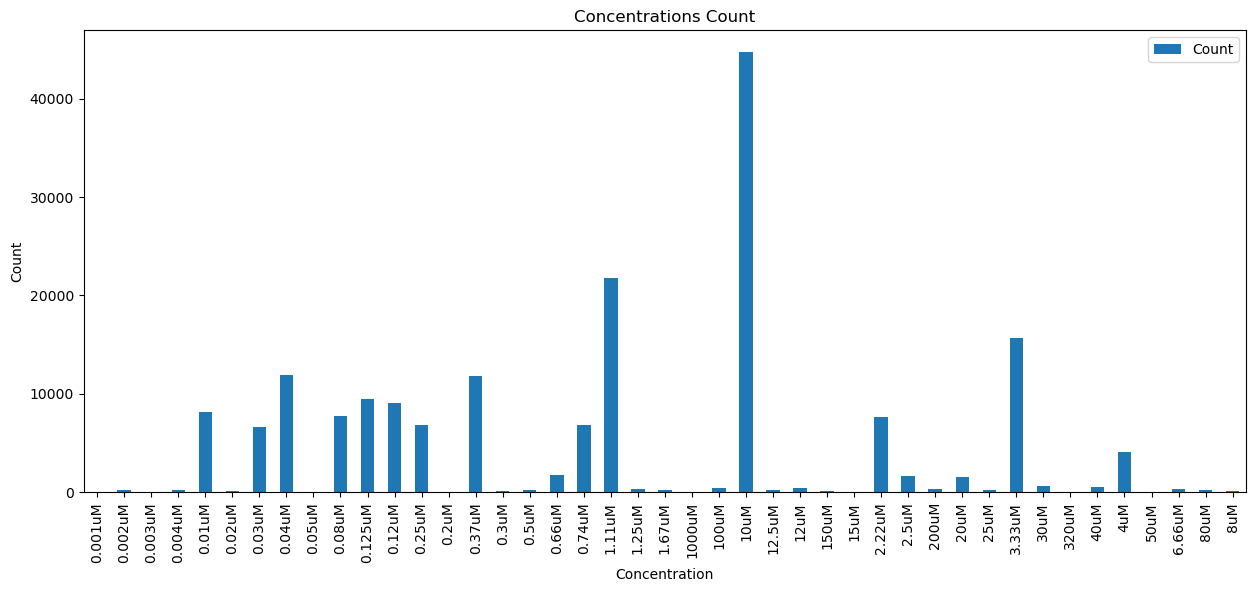

In [129]:
# Create a bar plot from the concentrations list

from collections import Counter
import matplotlib.pyplot as plt

concentrations_classes = list(set(concentrations))
concentrations.sort()
concentrations_classes.sort()

# Count the number of each class in concentration classes from concentrations list
concentrations_count = Counter(concentrations)

# Create a pandas dataframe from the concentrations count dictionary
df = pd.DataFrame.from_dict(concentrations_count, orient='index', columns=['Count'])

# Plot the dataframe as a bar plot with increased width
ax = df.plot(kind='bar', rot=90, figsize=(15, 6))

# Set the plot title and axis labels
ax.set_title('Concentrations Count')
ax.set_xlabel('Concentration')
ax.set_ylabel('Count')

# Show the plot
plt.show()


In [130]:
# Filter out rows with 10um concentration

conc = '10uM'
gene_expression_df_10um_conc = gene_expression_df_filtered[gene_expression_df['0'].str.contains(conc)]
gene_expression_df_10um_conc = gene_expression_df_10um_conc.reset_index(drop=True)
gene_expression_df_10um_conc

c:\Anaconda3\envs\dleps\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,0,2,3,4,5,6,7,8,9,10,...,242,243,244,245,246,247,248,249,250,251
0,ABY001_A375_XH_A14_erlotinib_10uM up,CDKN2C,TIMP3,COLGALT2,AMPD3,TGFB1,SERPINB3,MMP7,PIGR,WDR61,...,RHOBTB3,TMSB15A,RPS4Y1,JCHAIN,PLAT,FAM129A,ASNS,PCNA,TNFSF10,CHAC1
1,ABY001_A375_XH_A14_erlotinib_10uM down,PCP4,SPINK1,STEAP1,HOXC6,ITGB1BP1,MRPS16,XIST,UCHL1,FABP4,...,PEG3,WBP1L,SCG5,ATP5F1E,CCL19,EGLN1,MAST4,ATP6V1H,GPX2,EBP
2,ABY001_A375_XH_A16_lapatinib_10uM up,SLC1A3,TPPP,SELENOP,ADGRL3,SERPINA4,MAP2K5,MMP26,NLRP2,RHOA,...,NNT,CRIP1,TGM2,IL32,MYRF,SPRY1,SLC11A2,ALDH1A1,FGFR3,CASP10
3,ABY001_A375_XH_A16_lapatinib_10uM down,PUF60,HSPA1A,SPINK1,C3orf14,CYP1B1,MMP12,RRS1,KRT23,TSPYL5,...,MINPP1,PSMB10,STK10,PPP3CA,GAREM1,TTC19,EEF1D,PITRM1,CCN3,IL1R1
4,ABY001_A375_XH_D16_vorinostat_10uM up,TTC39A,VCAN,ANXA9,TRIM36,NUAK1,NOTCH2,SCNN1A,KRT1,RRAGD,...,IER3,HIST1H1C,MMP1,ASS1,IL17RB,ALDOC,CITED2,INSIG1,PRDX2,TMEM45A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44717,TAA001_SKNSH_24H_C19_vorinostat_10uM down,PCNA,RPS4Y1,SOX9,ANXA1,EIF1AY,RGCC,KDM5D,PDGFA,RBM34,...,NGRN,AKT3,FOSL1,CYTIP,CDKN2A,CXADR,ALG5,ZBTB38,ZNF91,GLIPR1
44718,TAA001_SKNSH_24H_J19_bicalutamide_10uM up,ANXA13,NDRG4,TGFBR1,TNXB,MPO,TTN,ANGPT1,CYTIP,KLF6,...,TFPI2,CALD1,GJA1,KLK6,HOPX,RARRES1,HSPA1A,HSPA2,PCNA,MAP7
44719,TAA001_SKNSH_24H_J19_bicalutamide_10uM down,CD9,USP7,PAK1,CCL20,ASS1,CDH1,CXCL2,SORD,SERPINA1,...,PIR,ALDH4A1,EIF2AK1,BHMT2,CES1,NARS,LEF1,RTF1,PMEL,ACAD8
44720,TAA001_SKNSH_24H_N13_vorinostat_10uM up,LRRN3,CHKA,POSTN,POLB,MARCKSL1,CDC20,ABHD17A,TESK2,MCAM,...,HIST2H2BE,IER3,PAK1,HSPA1A,GATM,SFN,HIST1H1C,KRT14,IFRD2,STK10


In [132]:
# Separate all up and down rows

up_df = gene_expression_df_10um_conc[gene_expression_df_10um_conc.iloc[:, 0].str.contains('up')]
up_df = up_df.reset_index(drop=True)
up_df.head()
up_df.to_csv("../../data/gene_expression_data/up/up_genes_all_drugs.csv", index=False)


In [133]:
down_df = gene_expression_df_10um_conc[gene_expression_df_10um_conc.iloc[:, 0].str.contains('down')]
down_df = down_df.reset_index(drop=True)
down_df.head()
down_df.to_csv("../../data/gene_expression_data/down/down_genes_all_drugs.csv", index=False)

In [138]:
# Extract up genes for each drug
## Load the up genes dataset
up_genes_df = pd.read_csv("../../data/gene_expression_data/up/up_genes_all_drugs.csv")
up_genes_df.head()

,0,2,3,4,5,6,7,8,9,10,...,242,243,244,245,246,247,248,249,250,251
0,ABY001_A375_XH_A14_erlotinib_10uM up,CDKN2C,TIMP3,COLGALT2,AMPD3,TGFB1,SERPINB3,MMP7,PIGR,WDR61,...,RHOBTB3,TMSB15A,RPS4Y1,JCHAIN,PLAT,FAM129A,ASNS,PCNA,TNFSF10,CHAC1
1,ABY001_A375_XH_A16_lapatinib_10uM up,SLC1A3,TPPP,SELENOP,ADGRL3,SERPINA4,MAP2K5,MMP26,NLRP2,RHOA,...,NNT,CRIP1,TGM2,IL32,MYRF,SPRY1,SLC11A2,ALDH1A1,FGFR3,CASP10
2,ABY001_A375_XH_D16_vorinostat_10uM up,TTC39A,VCAN,ANXA9,TRIM36,NUAK1,NOTCH2,SCNN1A,KRT1,RRAGD,...,IER3,HIST1H1C,MMP1,ASS1,IL17RB,ALDOC,CITED2,INSIG1,PRDX2,TMEM45A
3,ABY001_A375_XH_I02_erlotinib_10uM up,C7,BTG3,BDNF,MID1IP1,SPATS2L,SLC7A1,PAGE4,C5orf30,CYB561,...,PSAT1,TSPAN8,ASNS,LGR5,EGR2,MAMLD1,DHRS2,RPS4Y1,CHAC1,ADO
4,ABY001_A375_XH_I04_lapatinib_10uM up,ZNF706,PHKB,DEFA5,THAP11,MMP12,TAPBP,DPEP1,PLIN1,BCL2A1,...,SRC,GNAS,PLBD1,AKR1C3,KAT6A,SRGN,TFPI,GOLT1B,CASP10,CIAO3


In [140]:
# Extract the drug names from gene expression dataset

up_genes_df_copy = up_genes_df.copy()
for i in range(len(up_genes_df_copy)):
    up_genes_df_copy.iloc[i, 0] = up_genes_df_copy.iloc[i, 0].split('_')[4]
# up_genes_df.head()
up_genes_df_copy.to_csv('../../data/gene_expression_data/up/up_genes_all_drugs_clean_replicates.csv', index=False)

In [141]:
## Load the up genes dataset
down_genes_df = pd.read_csv("../../data/gene_expression_data/down/down_genes_all_drugs.csv")
# down_genes_df.head()

down_genes_df_copy = down_genes_df.copy()
for i in range(len(down_genes_df_copy)):
    down_genes_df_copy.iloc[i, 0] = down_genes_df_copy.iloc[i, 0].split('_')[4]
# up_genes_df.head()
down_genes_df_copy.to_csv('../../data/gene_expression_data/down/down_genes_all_drugs_clean_replicates.csv', index=False)

In [2]:
# Load the list of landmark genes
landmark_genes_df = pd.read_csv("../../data/978_landmark_genes.txt", delimiter="\t")
landmark_genes_df.head()

,Entrez ID,Symbol,Name,Gene Family,Type,RNA-Seq Correlation,RNA-Seq Correlation Self-Rank
0,3638,INSIG1,insulin induced gene 1,NaN,landmark,NaN,NaN
1,2309,FOXO3,forkhead box O3,Forkhead boxes,landmark,NaN,NaN
2,1001,CDH3,cadherin 3,Type I classical cadherins,landmark,NaN,NaN
3,4998,ORC1,origin recognition complex subunit 1,"AAA ATPases, Origin recognition complex",landmark,NaN,NaN
4,3682,ITGAE,integrin subunit alpha E,"CD molecules, Integrin alpha subunits",landmark,NaN,NaN


In [6]:
landmark_genes_df['Symbol'].to_csv("../../data/landmark_genes.csv", index=False)

In [ ]:
# Create a vector of columns=978 
# Denoting up genes=(+1), down genes=(-1), unaltered genes=(0)

In [23]:
up_down_encoded_df = pd.read_csv("../../data/gene_expression_data/up_down_encoded_vector.csv")
up_down_encoded_df_clean = up_down_encoded_df.drop_duplicates(subset=['DRUGS'])
up_down_encoded_df_clean

,DRUGS,IGF1R,RPS6,FBXO21,PLSCR1,PSME1,NFE2L2,MRPL19,AURKA,PLSCR3,...,TFAP2A,NPRL2,USP14,RPS6KA1,BNIP3,SATB1,PPARG,CSNK2A2,NFKBIB,WDR7
0,2-iodomelatonin,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2-phenylmelatonin,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5-methoxytryptamine,0,0,1,0,0,0,0,1,1,...,-1,-1,0,1,0,-1,-1,1,1,0
3,6-chloromelatonin,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,acalabrutinib,0,0,1,0,0,-1,0,0,-1,...,0,0,0,-1,0,0,-1,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,zibotentan,1,0,-1,-1,0,-1,0,0,-1,...,-1,-1,1,-1,-1,0,-1,1,1,-1
471,zileuton,-1,0,1,-1,0,1,-1,0,-1,...,0,1,0,1,1,0,-1,0,-1,-1
472,ziprasidone,0,0,-1,0,0,0,0,1,-1,...,-1,-1,-1,1,1,0,-1,0,-1,-1
473,zonisamide,-1,0,-1,1,0,-1,-1,0,1,...,-1,-1,-1,-1,0,1,-1,0,-1,1
